In [1]:
!pip install pandas


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import sklearn 
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN

In [3]:
Airlines = pd.read_excel('C:/Users/dell/Documents/EastWestAirlines.xlsx',sheet_name = 'data')
Airlines.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [4]:
Airlines.shape

(3999, 12)

In [5]:
#summary of the data
Airlines.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [6]:
Airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [7]:
# Renaming column 
Airlines = Airlines.rename(columns = {"ID#":'ID','Award?' : 'Award'})
Airlines

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [8]:
airlines = Airlines.drop(['ID','Award'],axis = 1)
airlines.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,28143,0,1,1,1,174,1,0,0,7000
1,19244,0,1,1,1,215,2,0,0,6968
2,41354,0,1,1,1,4123,4,0,0,7034
3,14776,0,1,1,1,500,1,0,0,6952
4,97752,0,4,1,1,43300,26,2077,4,6935


In [9]:
# check for null values
airlines.isnull().sum()

Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
dtype: int64

In [10]:
#check for duplicate values
airlines[airlines.duplicated()].shape

(1, 10)

In [11]:
airlines[airlines.duplicated()]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
3876,1000,0,1,1,1,0,0,0,0,1597


In [12]:
Airlines=airlines.drop_duplicates()

In [13]:
Airlines[Airlines.duplicated()]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll


<function matplotlib.pyplot.show(close=None, block=None)>

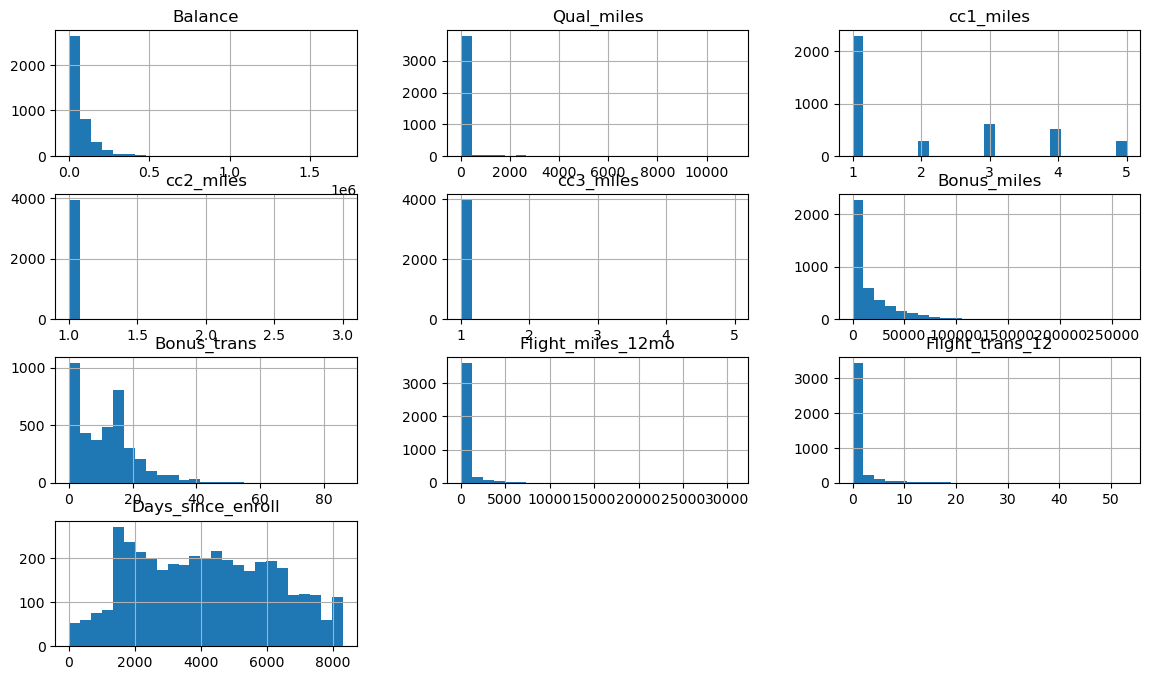

In [14]:
Airlines.hist(figsize = (14,8),bins = 25)
plt.show

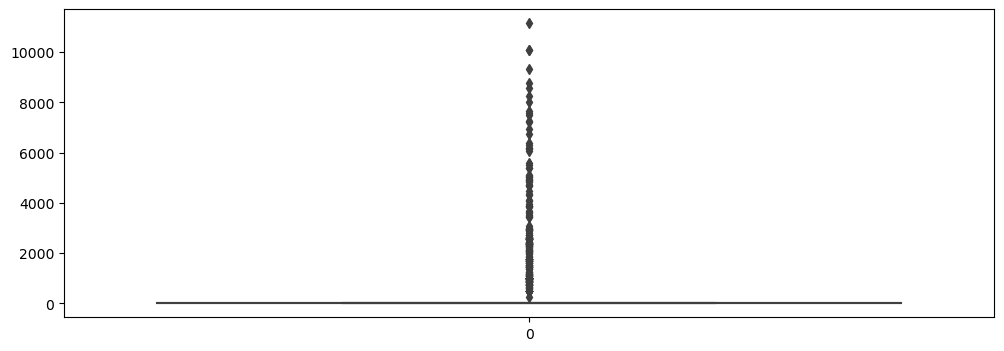

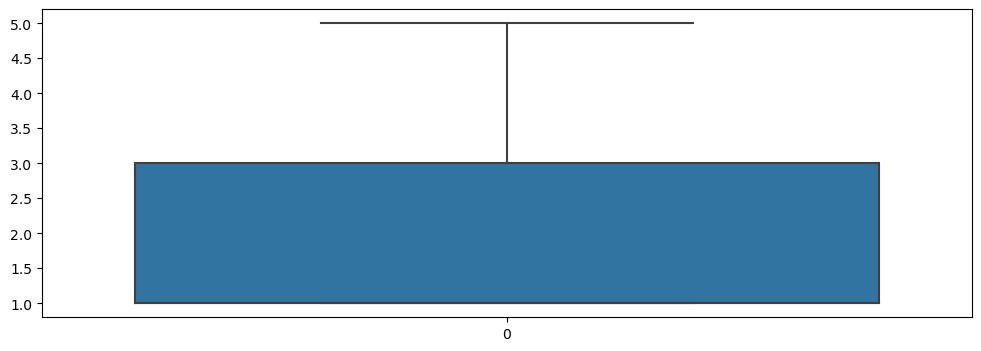

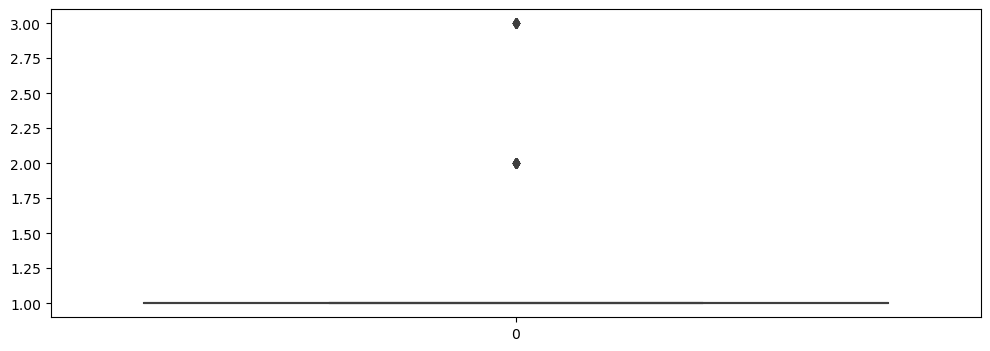

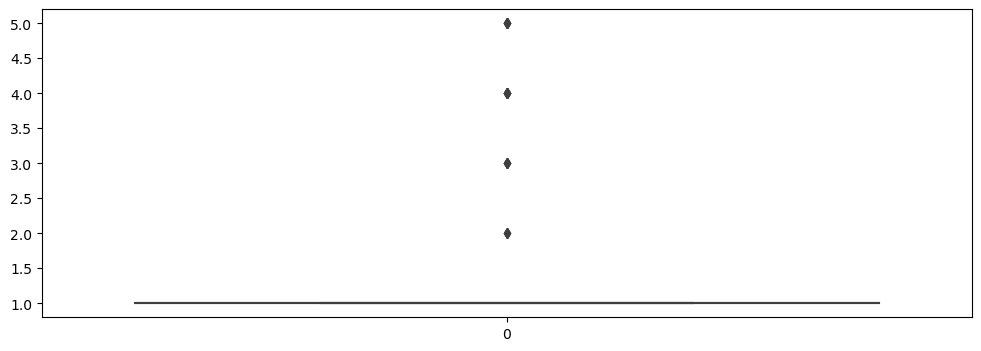

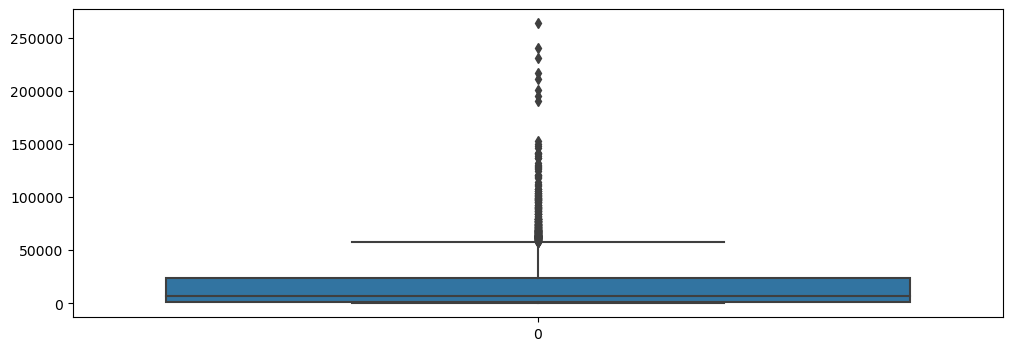

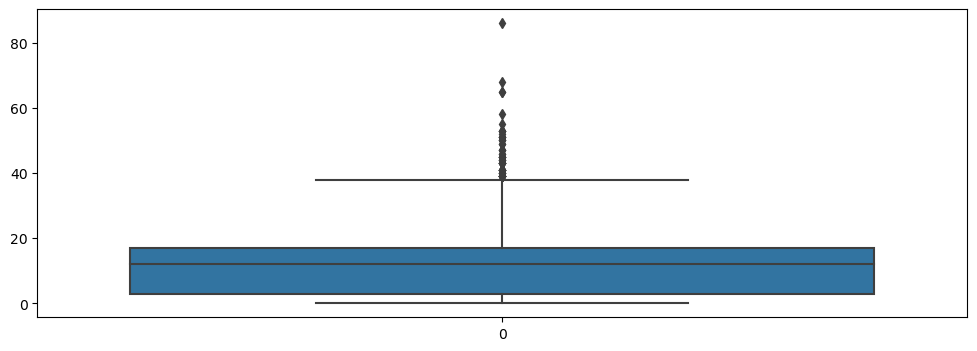

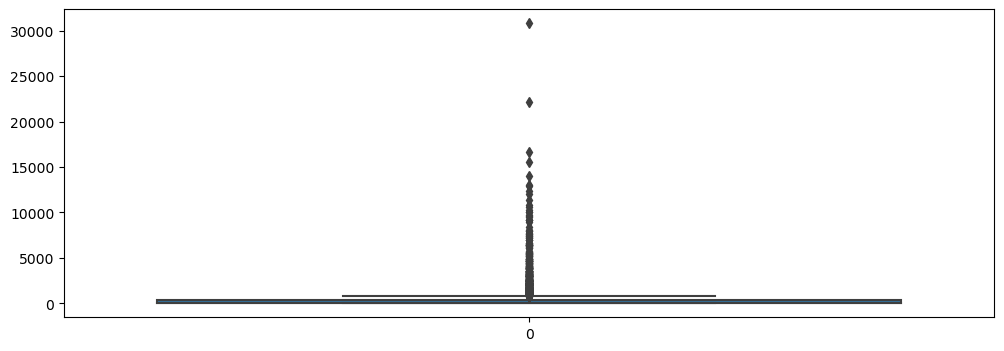

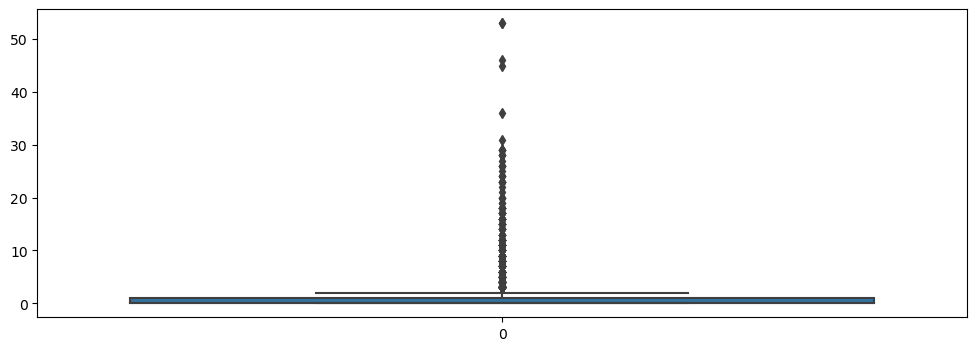

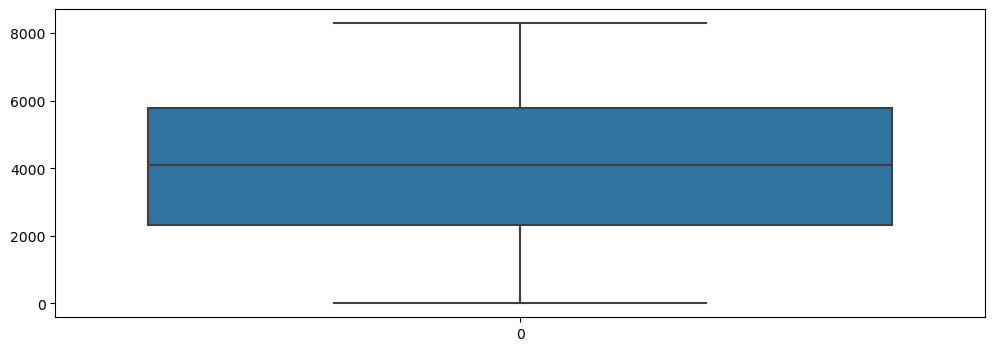

In [15]:
for feature in Airlines.columns[1:]:
    plt.figure(figsize =(12,4))
    sns.boxplot(Airlines[feature])

<Axes: >

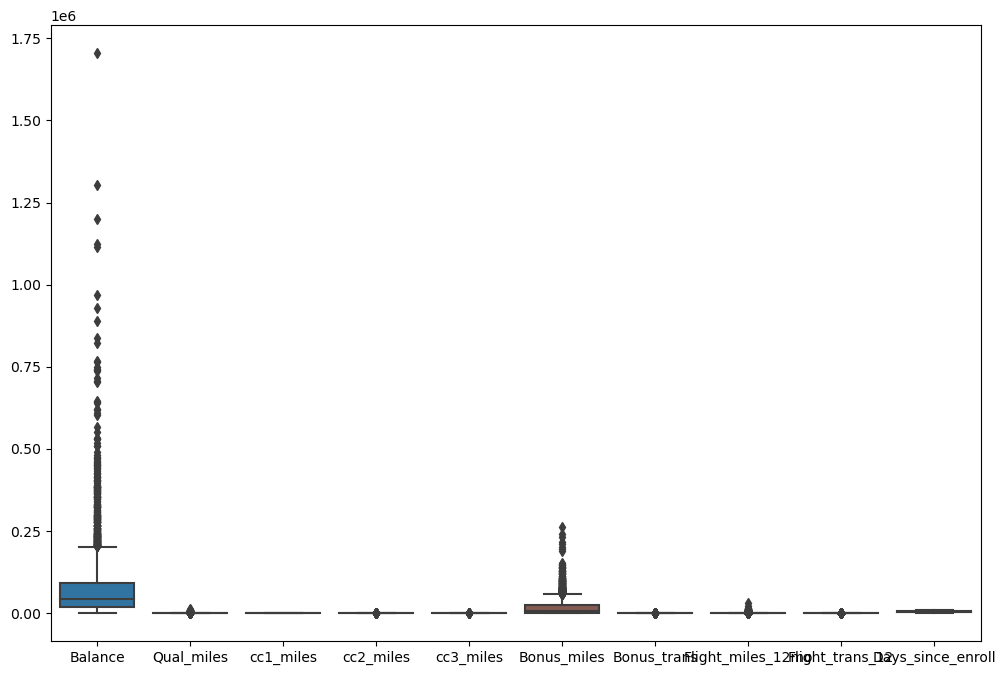

In [16]:
plt.figure(figsize = (12,8))
sns.boxplot(data = Airlines)

<Axes: >

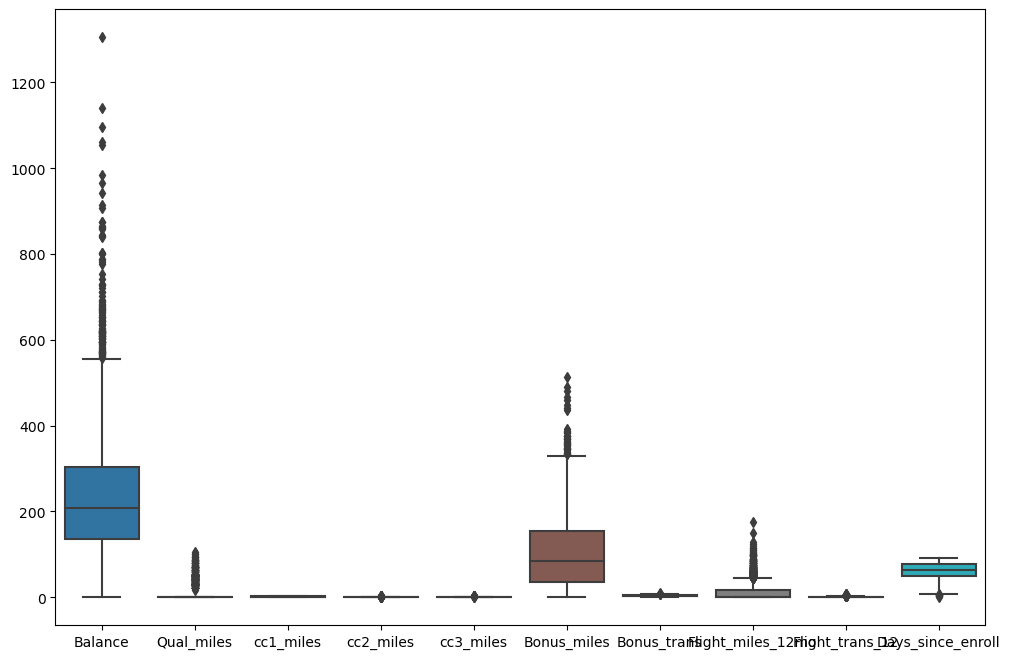

In [17]:
# we use sqrt() to see more clearly despite the outliers

plt.figure(figsize=(12,8))
sns.boxplot(data=np.sqrt(Airlines))

In [18]:
# checking for correlation variables
Airlines.corr()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
Balance,1.000000,0.108696,0.338252,-0.008822,0.035234,0.403410,0.324797,0.217509,0.255656,0.262975
Qual_miles,0.108696,1.000000,0.007896,-0.013928,-0.007782,0.030990,0.050678,0.126761,0.143990,0.017259
cc1_miles,0.338252,0.007896,1.000000,-0.068247,0.060548,0.825177,0.608867,0.037310,0.041267,0.230674
cc2_miles,-0.008822,-0.013928,-0.068247,1.000000,-0.006168,-0.003987,0.064381,0.010590,0.028276,-0.005838
cc3_miles,0.035234,-0.007782,0.060548,-0.006168,1.000000,0.204136,0.097312,-0.001783,-0.001122,0.010815
Bonus_miles,0.403410,0.030990,0.825177,-0.003987,0.204136,1.000000,0.603114,0.183492,0.185211,0.210232
Bonus_trans,0.324797,0.050678,0.608867,0.064381,0.097312,0.603114,1.000000,0.377190,0.432341,0.160953
Flight_miles_12mo,0.217509,0.126761,0.037310,0.010590,-0.001783,0.183492,0.377190,1.000000,0.869189,0.037178
Flight_trans_12,0.255656,0.143990,0.041267,0.028276,-0.001122,0.185211,0.432341,0.869189,1.000000,0.059161
Days_since_enroll,0.262975,0.017259,0.230674,-0.005838,0.010815,0.210232,0.160953,0.037178,0.059161,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

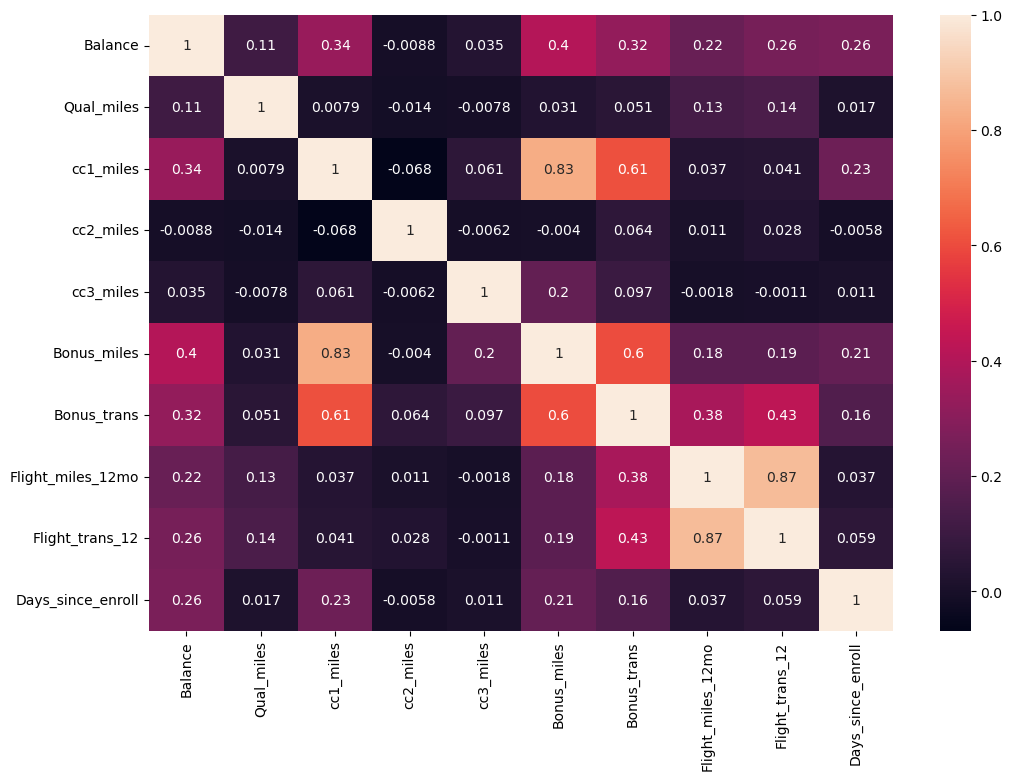

In [19]:
plt.figure(figsize=(12,8))
sns.heatmap(Airlines.corr(),annot = True)
plt.show

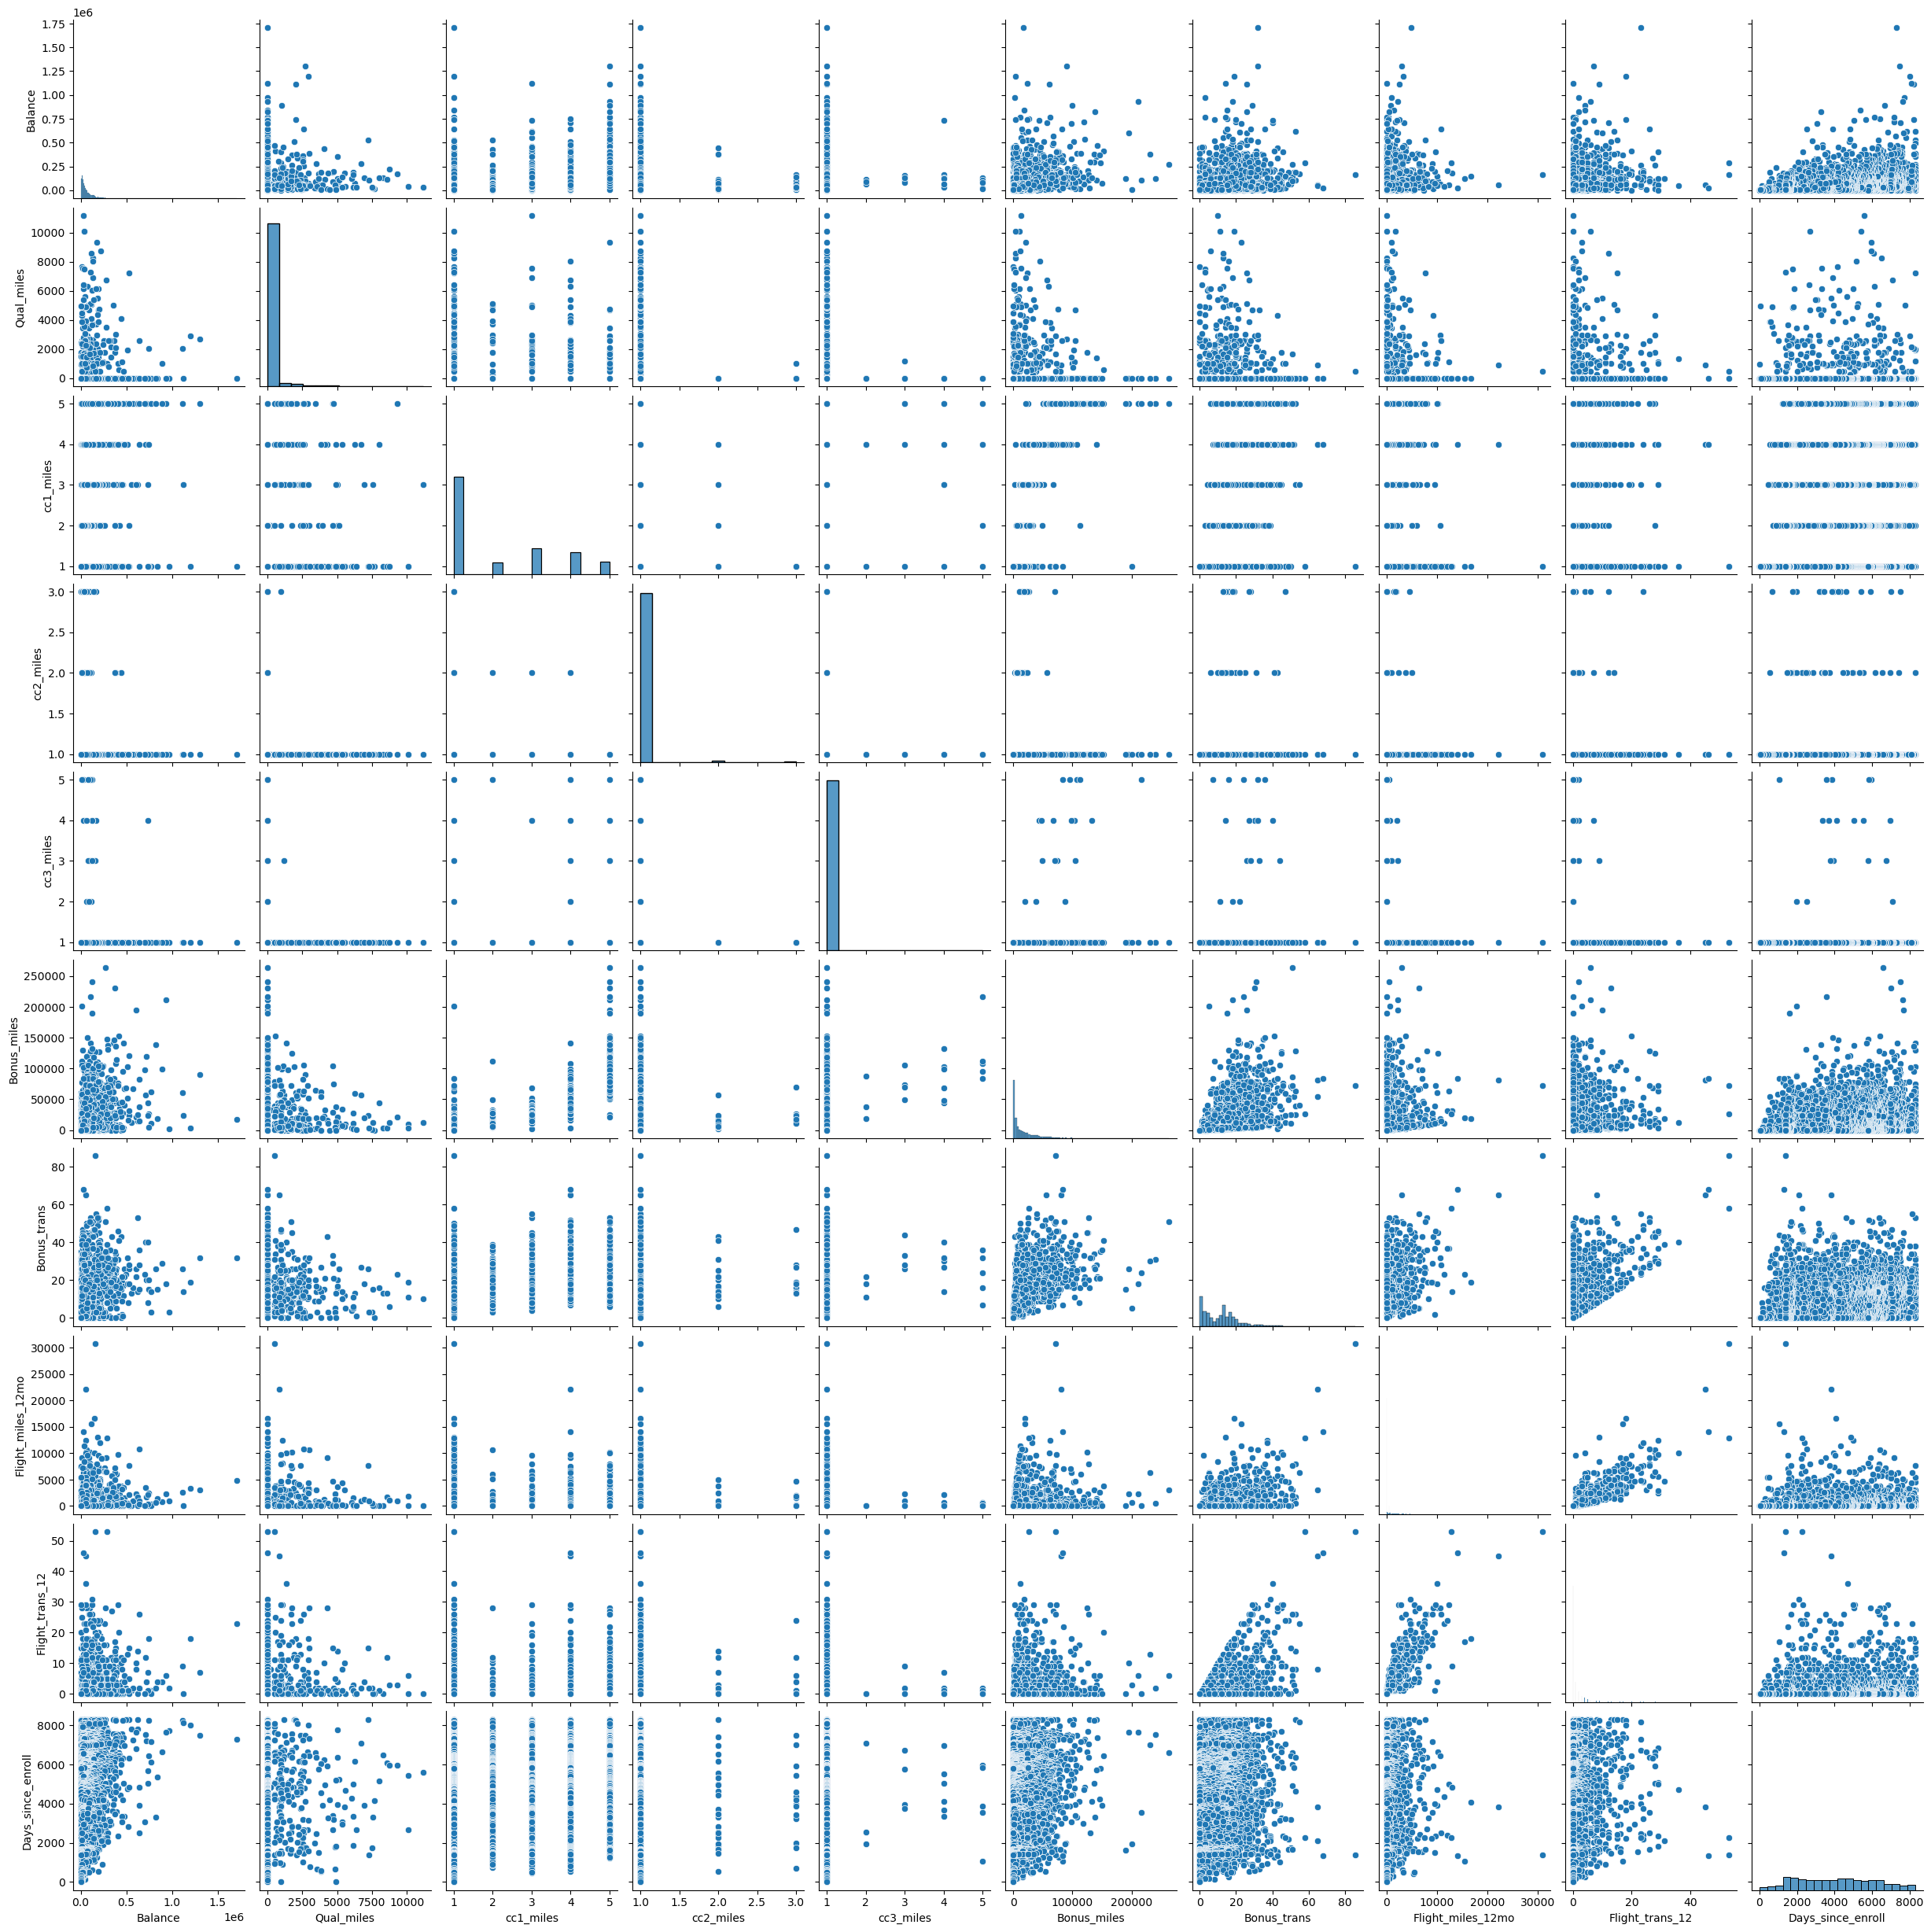

In [20]:
sns.pairplot(data=Airlines)

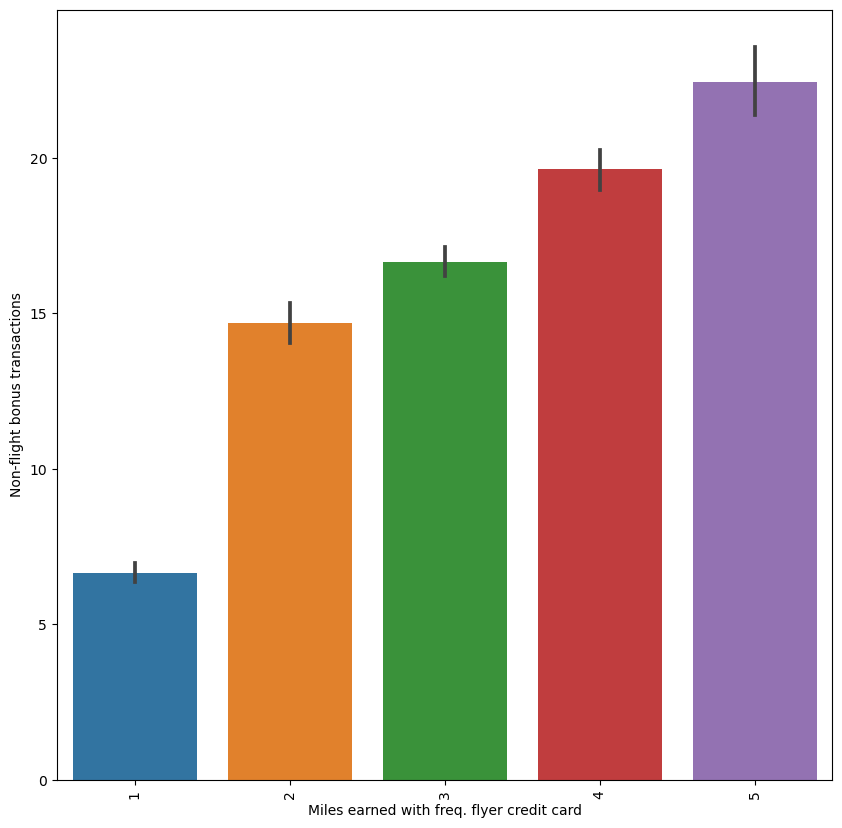

In [21]:
# Plotting frequent flying bonuses vs. non-flight bonus transactions 
plt.figure(figsize = (10,10))
sorted_data = Airlines[['cc1_miles','Bonus_trans']].sort_values('Bonus_trans', ascending = False)
ax = sns.barplot(x='cc1_miles', y='Bonus_trans', data= sorted_data)
ax.set(xlabel = 'Miles earned with freq. flyer credit card', ylabel= 'Non-flight bonus transactions')
plt.xticks(rotation=90)
plt.show()

Data Preprocessing

In [22]:
standard_scaler = StandardScaler()
std_df = standard_scaler.fit_transform(Airlines)
std_df.shape

(3998, 10)

In [23]:
#Using Minmaxscaler for accuracy result comparison

from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()

minmax_df = minmax.fit_transform(Airlines)
minmax_df.shape

(3998, 10)

###### Heirarchical Clustering

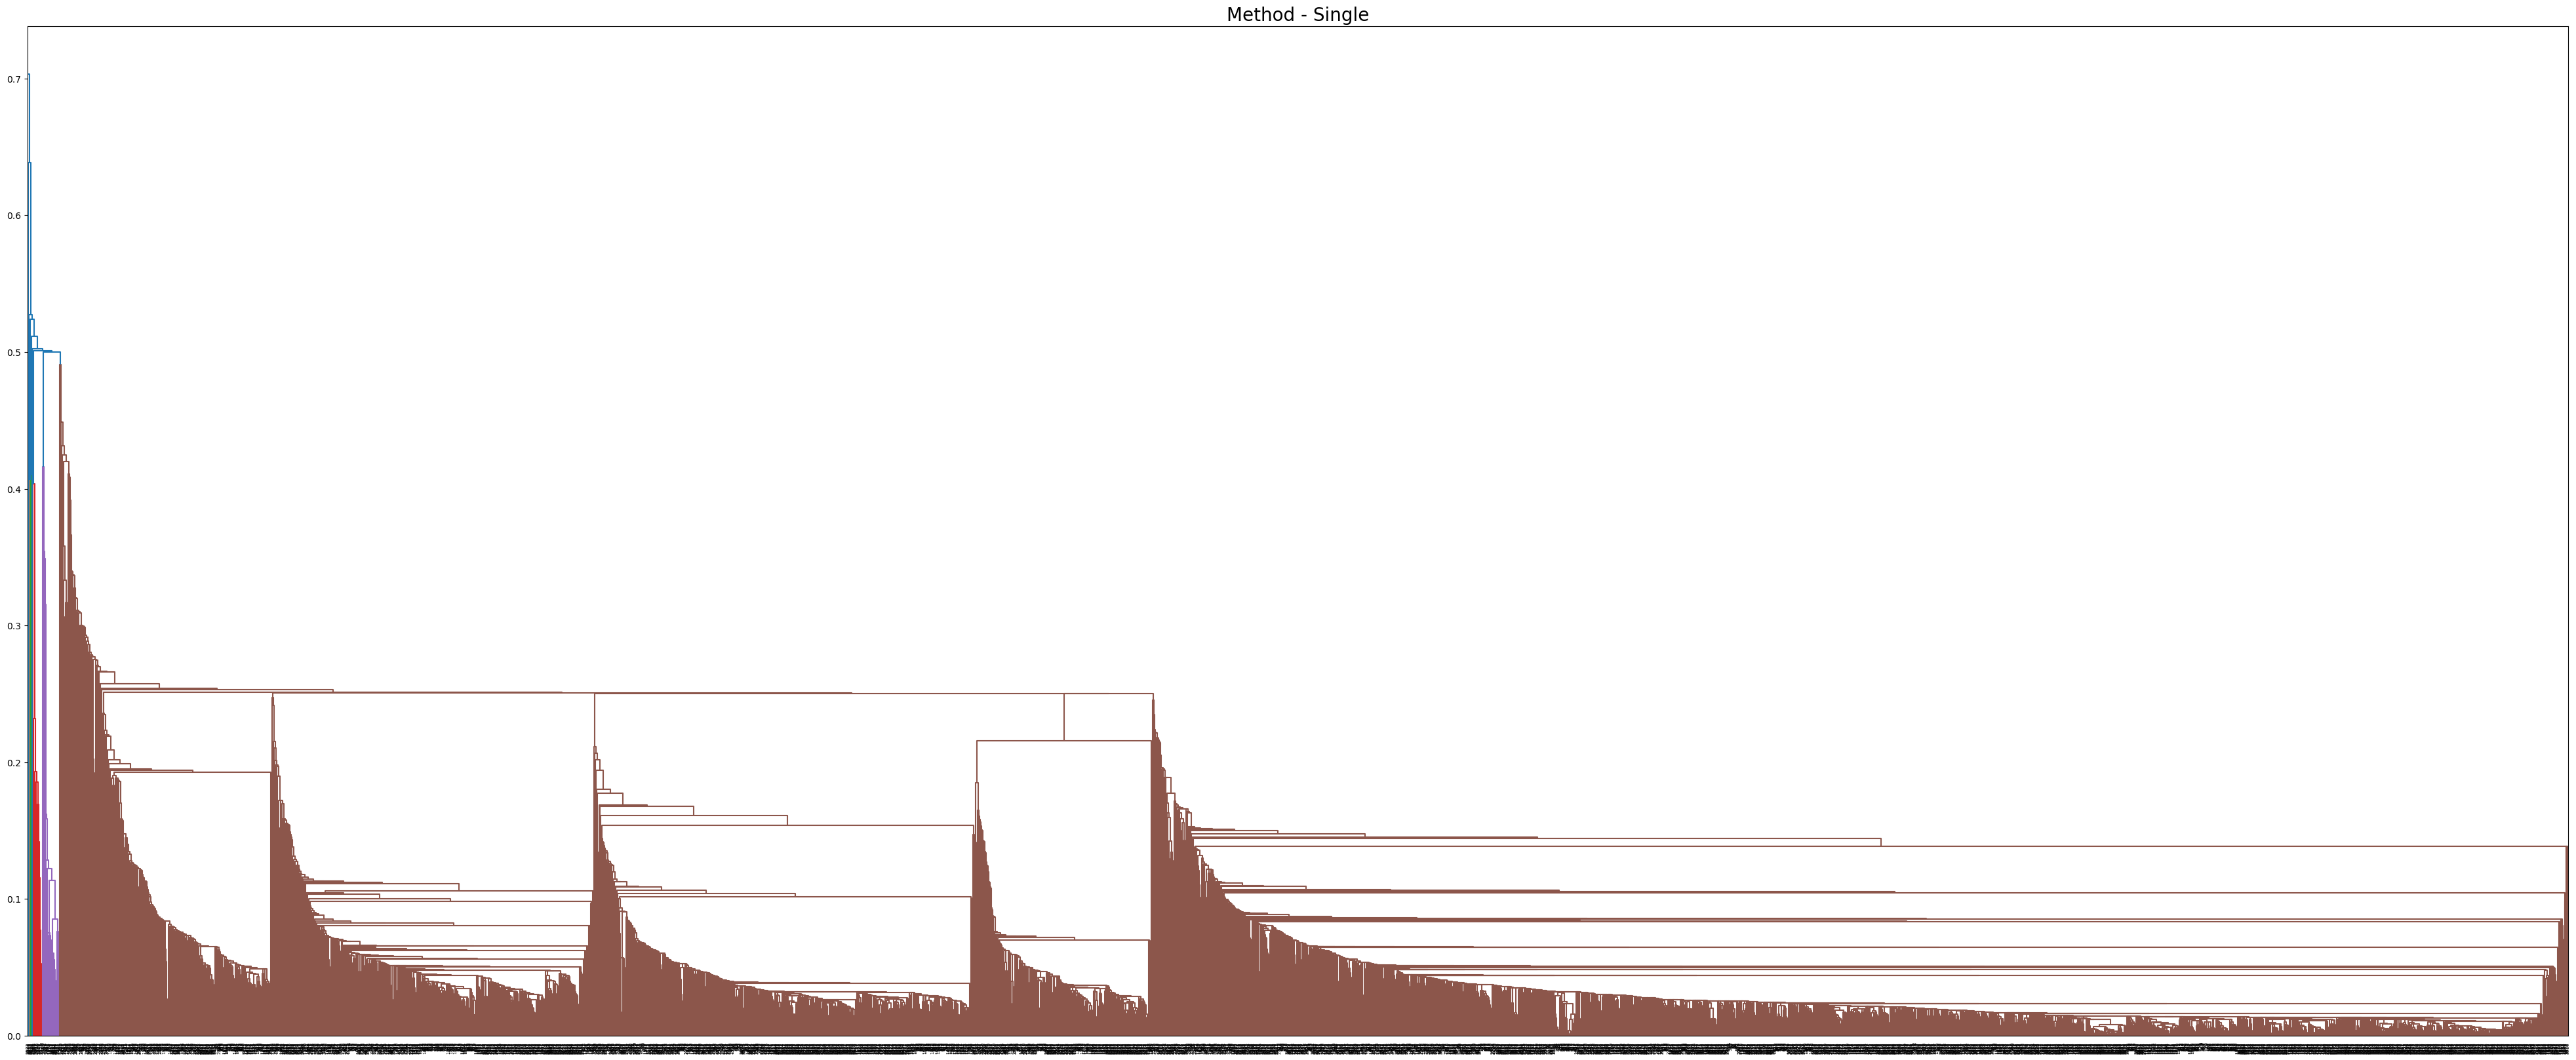

In [24]:
#create dendrogram
plt.figure(figsize=(50,20))
dendrogram = sch.dendrogram(sch.linkage(minmax_df, method='single'))
plt.title("Method - Single", fontsize=20)
plt.show()
    

In [27]:
from sklearn.cluster import AgglomerativeClustering
#creating clusters method - single
hc_s = AgglomerativeClustering(n_clusters=6, linkage= 'single')
     

In [28]:
y_hc = hc_s.fit_predict(minmax_df)
y_hc

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [30]:
Airlines['h_clusterid'] = y_hc
Airlines

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,h_clusterid
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,0
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,0
3995,64385,0,1,1,1,981,5,0,0,1395,0
3996,73597,0,3,1,1,25447,8,0,0,1402,0
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [31]:
Airlines.h_clusterid.value_counts()

0    3991
2       2
1       2
5       1
3       1
4       1
Name: h_clusterid, dtype: int64

In [32]:
Airlines.groupby('h_clusterid').agg(['mean']).reset_index()
     

,h_clusterid,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,73577.682786,144.055625,2.060135,1.014533,1.010524,17030.121774,11.549236,440.817088,1.326234,4122.615385
1,1,72811.000000,0.000000,1.000000,1.000000,4.500000,65932.500000,10.500000,0.000000,0.000000,2204.000000
2,2,40425.500000,444.000000,4.000000,1.000000,1.000000,82211.000000,66.500000,18075.000000,45.500000,2578.000000
3,3,287033.000000,0.000000,1.000000,1.000000,1.000000,26161.000000,58.000000,12873.000000,53.000000,2272.000000
4,4,160114.000000,500.000000,1.000000,1.000000,1.000000,71954.000000,86.000000,30817.000000,53.000000,1373.000000
5,5,8557.000000,0.000000,1.000000,1.000000,1.000000,200622.000000,5.000000,622.000000,3.000000,1955.000000


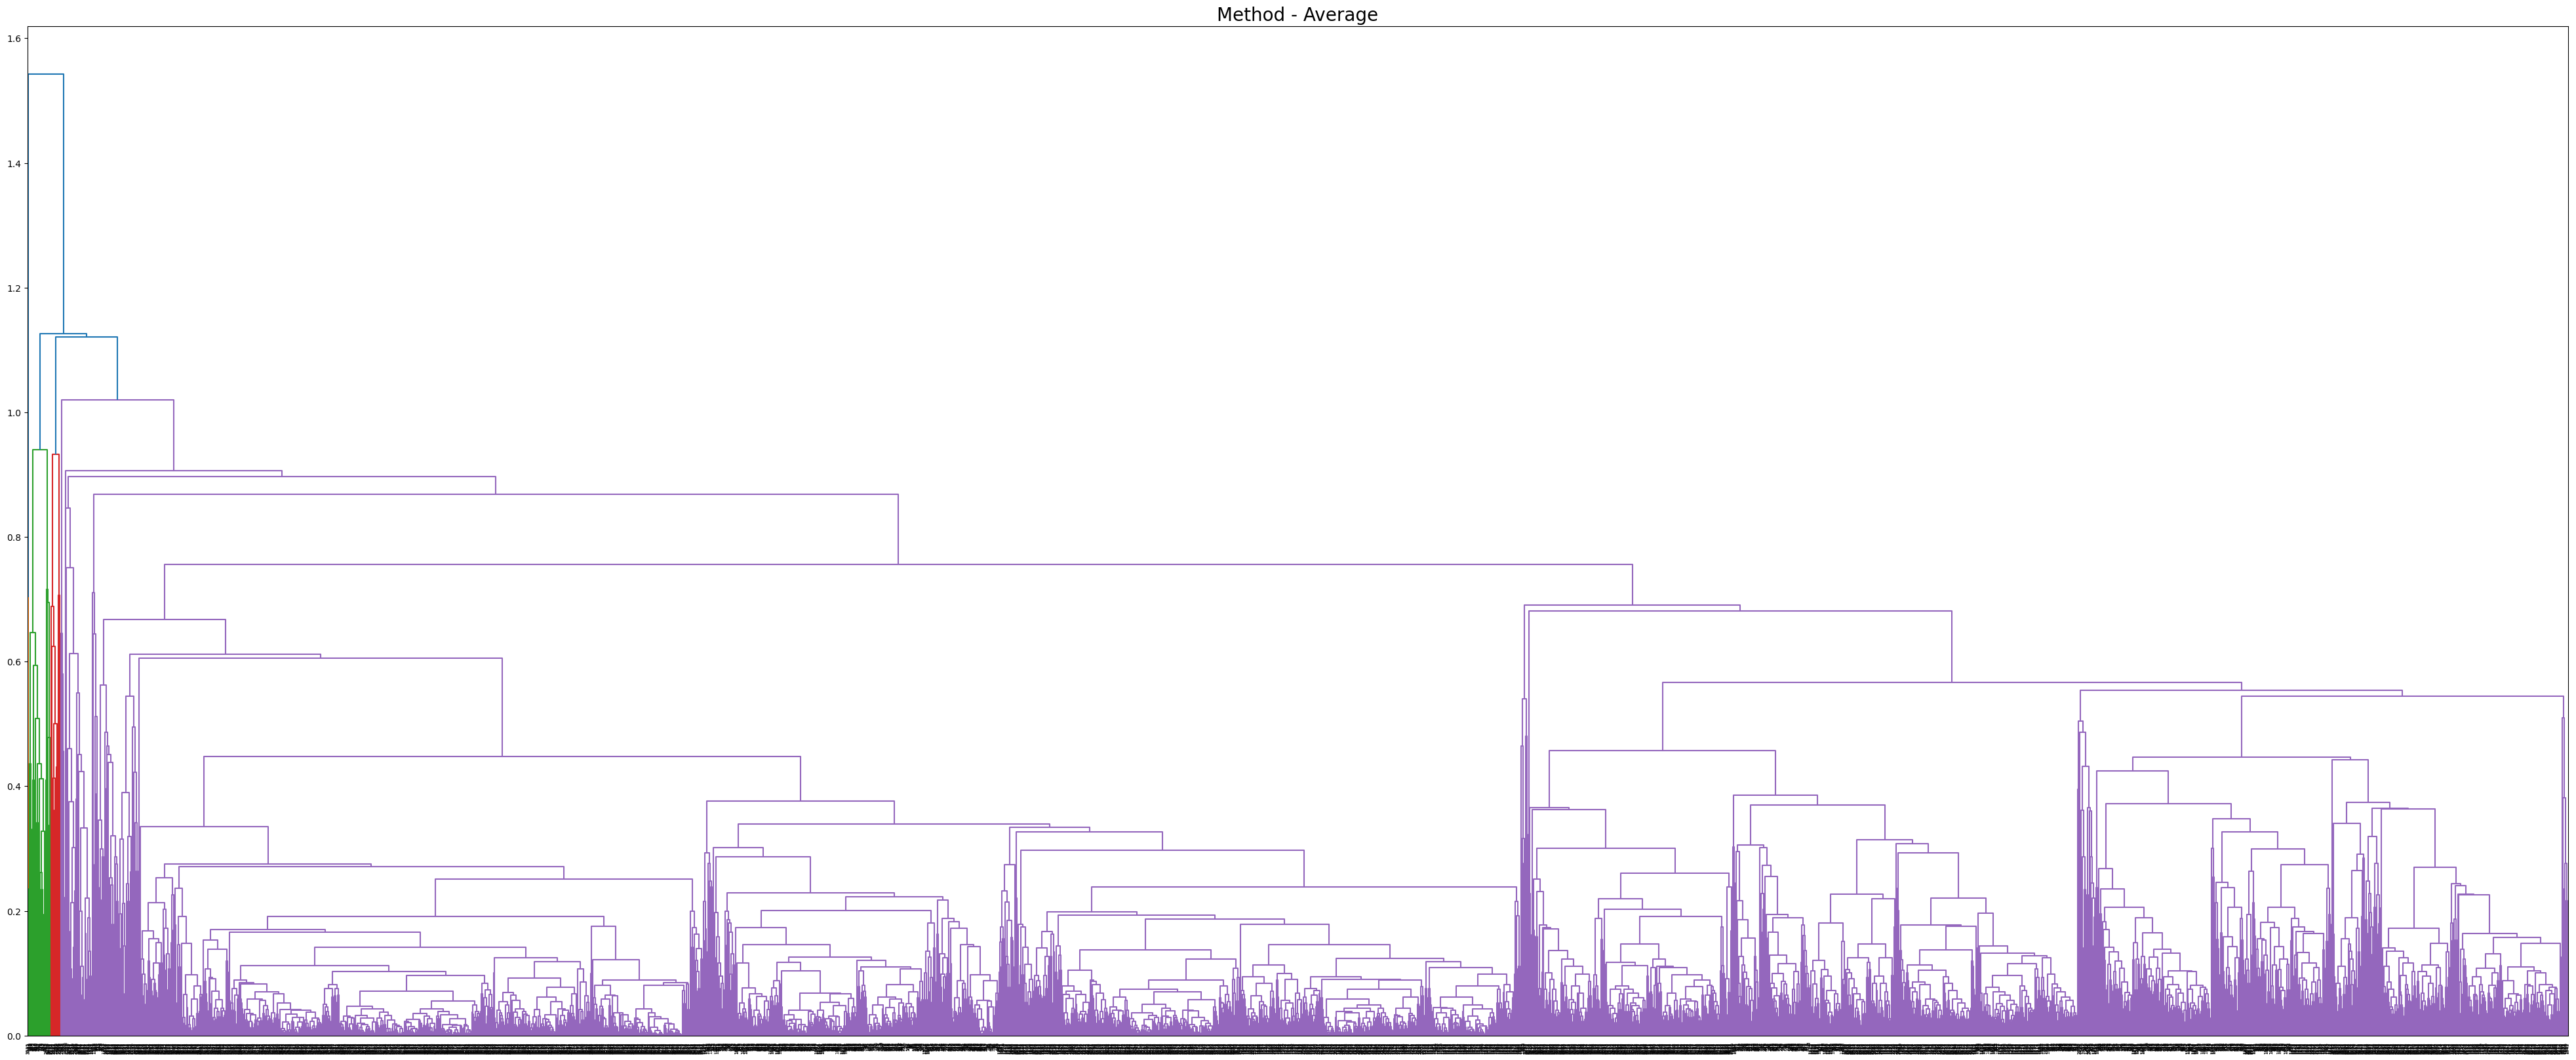

In [34]:
#create dendrogram
plt.figure(figsize=(50,20))
dendrogram = sch.dendrogram(sch.linkage(minmax_df, method='average'))
plt.title("Method - Average", fontsize=20)
plt.show()

In [35]:
#creating clusters method - average
hc_a = AgglomerativeClustering(n_clusters=7, linkage= 'average')
     

In [36]:
y_hc_a = hc_a.fit_predict(minmax_df)
y_hc_a

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [40]:
Airlines2 = Airlines.copy() 
Airlines2['h_clusterid'] = y_hc_a
Airlines2 

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,h_clusterid
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,0
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,0
3995,64385,0,1,1,1,981,5,0,0,1395,0
3996,73597,0,3,1,1,25447,8,0,0,1402,0
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [41]:
Airlines2.h_clusterid.value_counts()

0    3939
5      27
6      11
1       8
4       7
2       4
3       2
Name: h_clusterid, dtype: int64

In [42]:
Airlines2.groupby('h_clusterid').agg(['mean']).reset_index()
     

,h_clusterid,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,70572.399848,125.056613,2.032242,1.014725,1.000762,16045.955319,11.268596,405.968266,1.214014,4096.871795
1,1,121283.125000,983.375000,4.250000,1.000000,1.000000,64456.375000,53.750000,9670.875000,28.500000,2611.375000
2,2,64521.000000,295.500000,1.250000,1.000000,4.250000,73273.750000,15.750000,575.000000,2.250000,4242.750000
3,3,223573.500000,250.000000,1.000000,1.000000,1.000000,49057.500000,72.000000,21845.000000,53.000000,1822.500000
4,4,158765.285714,9158.000000,1.285714,1.000000,1.000000,9694.000000,14.000000,1770.142857,5.142857,5789.857143
5,5,435049.481481,372.629630,4.925926,1.000000,1.000000,120988.148148,33.925926,3689.111111,11.740741,7284.111111
6,6,164803.363636,0.000000,4.272727,1.000000,4.000000,101438.454545,32.545455,481.818182,1.363636,4748.818182


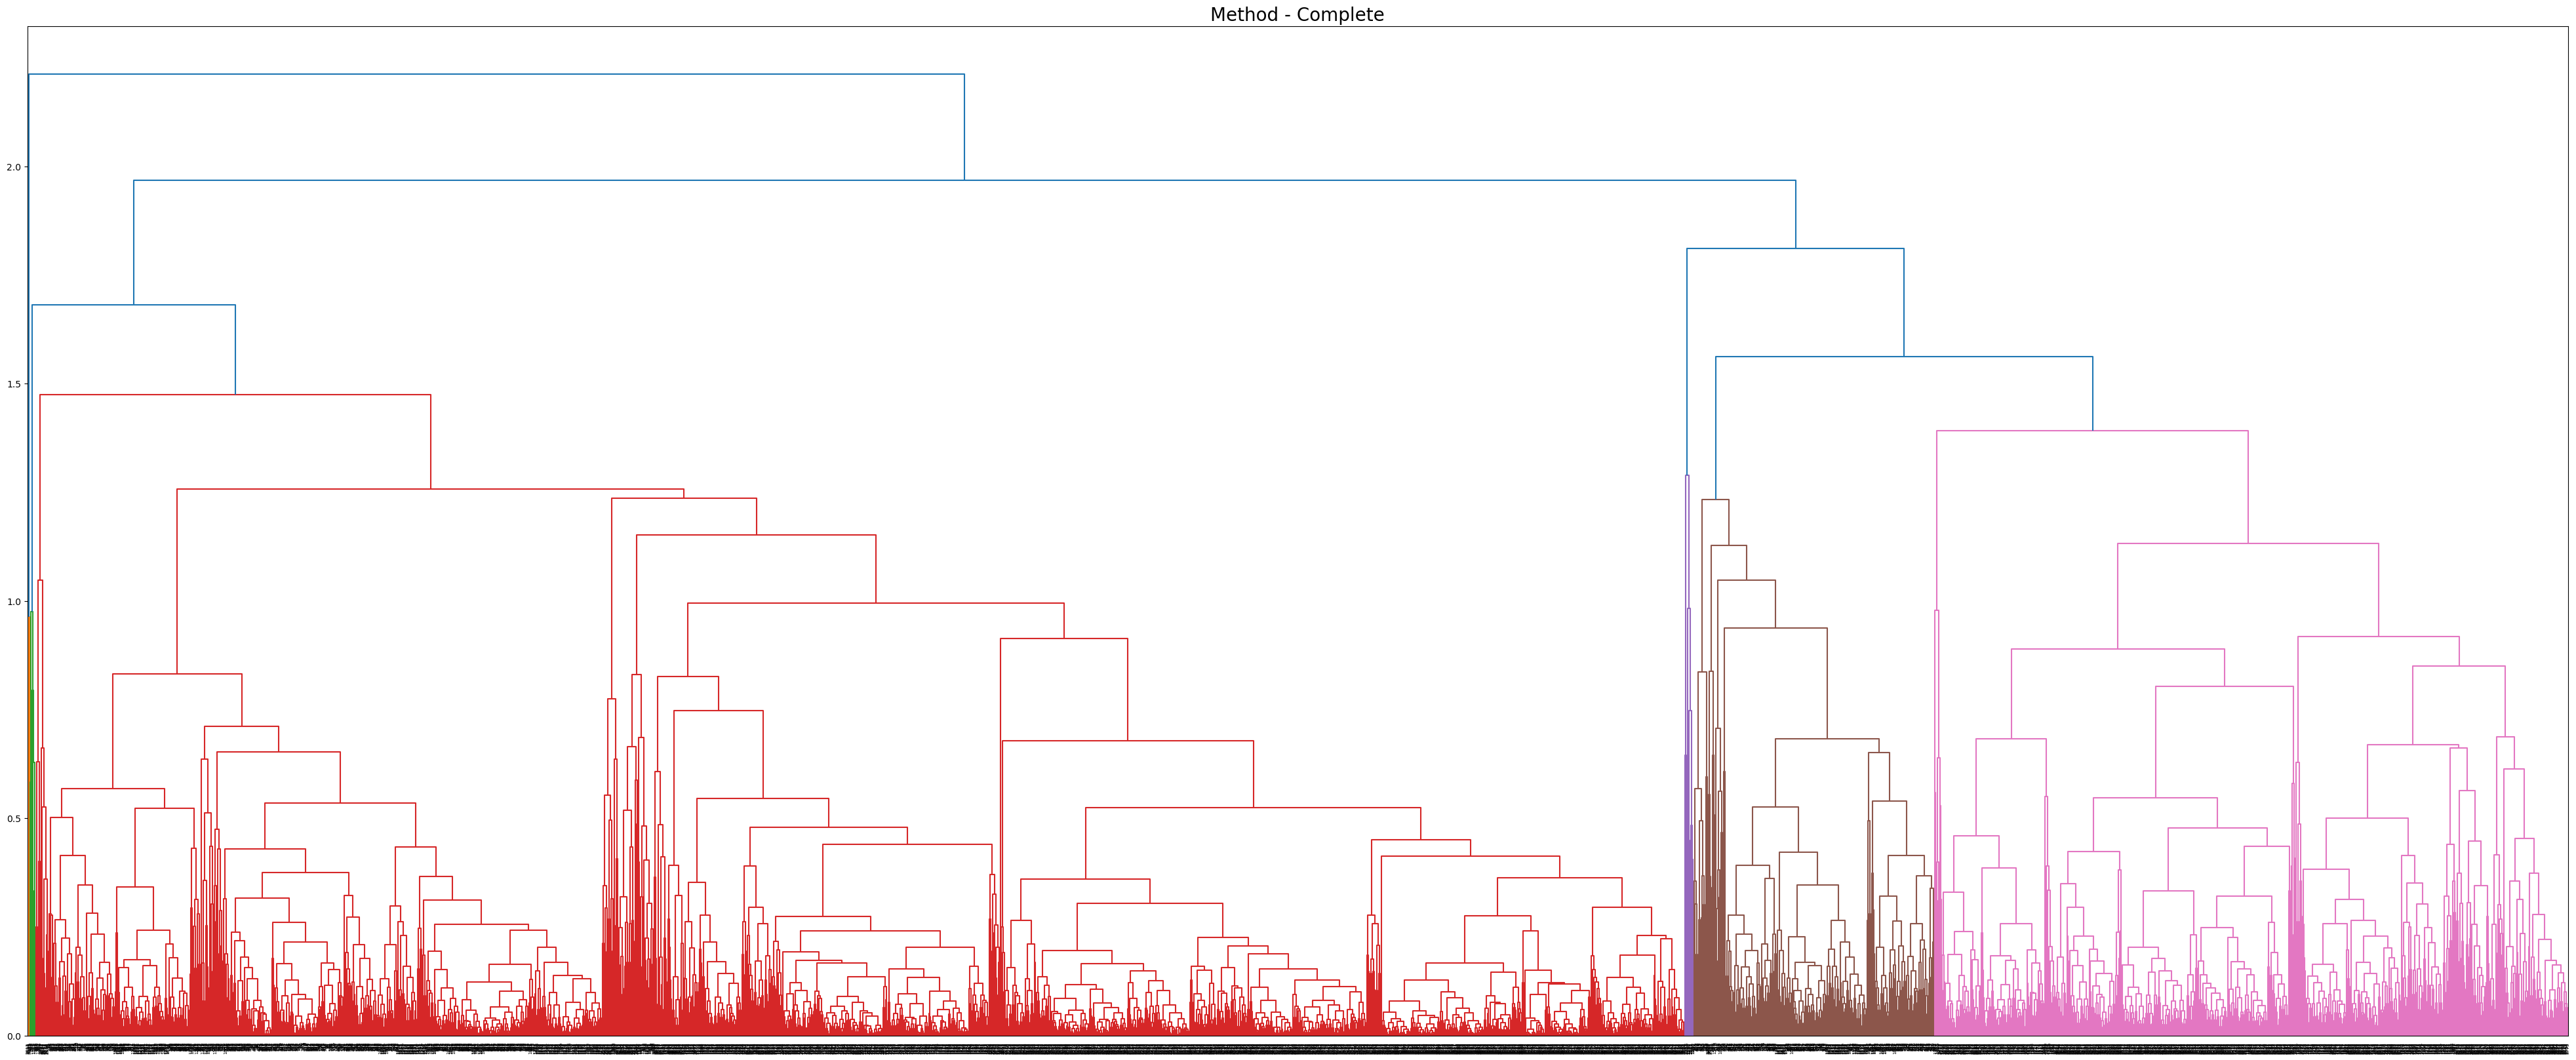

In [43]:
#create dendrogram
plt.figure(figsize=(50,20))
dendrogram = sch.dendrogram(sch.linkage(minmax_df, method='complete'))
plt.title("Method - Complete", fontsize=20)
plt.show()
     

In [44]:
#creating clusters method - Complete
hc_c = AgglomerativeClustering(n_clusters=8, linkage= 'complete')     

In [45]:
y_hc_c = hc_c.fit_predict(minmax_df)
y_hc_c     

array([2, 2, 2, ..., 1, 2, 2], dtype=int64)

In [46]:
Airlines3=Airlines.copy()
Airlines3['h_clusterid'] = y_hc_c
Airlines3
     

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,h_clusterid
0,28143,0,1,1,1,174,1,0,0,7000,2
1,19244,0,1,1,1,215,2,0,0,6968,2
2,41354,0,1,1,1,4123,4,0,0,7034,2
3,14776,0,1,1,1,500,1,0,0,6952,2
4,97752,0,4,1,1,43300,26,2077,4,6935,5
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,2
3995,64385,0,1,1,1,981,5,0,0,1395,2
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,2


In [47]:
Airlines3.h_clusterid.value_counts()

2    2576
1     986
5     379
6      19
0      14
3      11
4       9
7       4
Name: h_clusterid, dtype: int64

In [48]:
Airlines3.groupby('h_clusterid').agg(['mean']).reset_index()

,h_clusterid,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,141021.000000,0.000000,3.642857,1.000000,4.142857,97132.785714,28.214286,378.571429,1.071429,4462.142857
1,1,87047.471602,89.340771,3.403651,1.001014,1.002028,31848.043611,17.754564,340.475659,0.948276,3287.008114
2,2,52383.025621,138.116071,1.202252,1.008540,1.001165,5294.515528,7.594720,413.806677,1.236413,4071.035714
3,3,127716.454545,6287.454545,4.181818,1.000000,1.000000,49079.818182,18.636364,723.090909,2.454545,5058.454545
4,4,957355.333333,1355.000000,1.222222,1.000000,1.000000,14267.222222,15.555556,2392.666667,9.111111,7318.666667
5,5,157496.907652,128.474934,4.337731,1.002639,1.000000,55096.277045,20.992084,825.480211,2.646438,6486.087071
6,6,70975.210526,52.631579,1.052632,2.789474,1.000000,18380.473684,18.578947,558.052632,2.578947,4712.368421
7,7,131999.500000,347.000000,2.500000,1.000000,1.000000,65634.250000,69.250000,19960.000000,49.250000,2200.250000


##### KMeans Clustering

In [49]:
from sklearn.cluster import KMeans

In [50]:
Airlines = pd.read_excel('C:/Users/dell/Documents/EastWestAirlines.xlsx',sheet_name = 'data')
Airlines.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


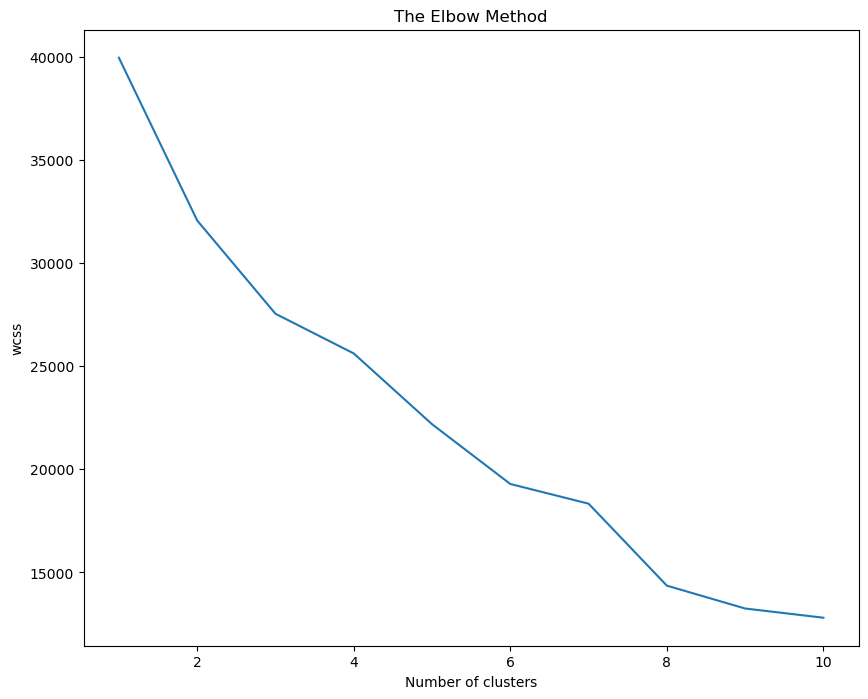

In [51]:
fig = plt.figure(figsize = (10,8))
wcss = []
for i in range(1,11):
    k_cluster = KMeans(n_clusters=i)
    k_cluster.fit(std_df)
    wcss.append(k_cluster.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.ylabel('wcss')
plt.xlabel('Number of clusters')
plt.show()

In [52]:
from pandas.core.common import random_state
clusters_new = KMeans(8, random_state=32)
clusters_new.fit(std_df)

KMeans(random_state=32)

In [53]:
clusters_new.labels_

array([4, 4, 4, ..., 0, 0, 0])

In [59]:
Airlines4=Airlines.copy()
extra_label = [0] 
Airlines4['h_clusterid'] = clusters_new.labels_.tolist() + extra_label

In [60]:
Airlines4

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid
0,1,28143,0,1,1,1,174,1,0,0,7000,0,4
1,2,19244,0,1,1,1,215,2,0,0,6968,0,4
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,4
3,4,14776,0,1,1,1,500,1,0,0,6952,0,4
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


In [61]:
Airlines4.groupby('h_clusterid').agg(['mean']).reset_index()

,h_clusterid,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,3112.659875,34059.943574,44.269592,1.131661,1.000784,1.000000,3978.011755,6.120690,210.818966,0.616771,2141.977273,0.193574
1,1,1878.012939,75081.481516,35.670055,3.256932,1.000000,1.000924,26079.886322,17.413124,238.378004,0.701479,4378.793900,0.500924
2,2,1862.267857,164184.080357,494.348214,1.982143,1.000000,1.000000,28139.464286,27.544643,6099.428571,17.919643,4444.750000,0.776786
3,3,2269.348837,68823.976744,23.255814,1.139535,2.325581,1.000000,14588.395349,17.325581,582.627907,2.209302,3968.953488,0.395349
4,4,1081.880000,57028.861905,62.813333,1.113333,1.000000,1.000952,4184.075238,6.443810,294.609524,0.885714,5762.009524,0.290476
5,5,2111.166667,114896.166667,5350.383333,2.016667,1.000000,1.000000,18885.016667,12.200000,908.033333,2.750000,3878.716667,0.516667
6,6,1664.866667,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333
7,7,1273.479224,220055.440443,101.675900,4.584488,1.000000,1.002770,68015.626039,22.149584,646.044321,2.011080,5480.839335,0.675900


###### DBSCAN

In [62]:
from sklearn.cluster import DBSCAN

In [63]:
Airlines = pd.read_excel('C:/Users/dell/Documents/EastWestAirlines.xlsx',sheet_name = 'data')
Airlines.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [64]:
dbscan = DBSCAN(eps = 1, min_samples=8)
dbscan.fit(std_df)

DBSCAN(eps=1, min_samples=8)

In [65]:
#Noisy points are given by the label -1
dbscan.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [66]:
cl = pd.DataFrame(dbscan.labels_, columns=['clusters'])

In [67]:
cl

,clusters
0,0
1,0
2,0
3,0
4,0
...,...
3993,0
3994,0
3995,0
3996,0


In [68]:
Airlines_d=pd.concat([Airlines,cl], axis=1)
Airlines_d.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0.0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0.0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0.0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0.0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0.0


In [69]:
Airlines_d['clusters'].value_counts()

 0.0    3446
-1.0     523
 1.0      18
 2.0      11
Name: clusters, dtype: int64

In [70]:
#clusters by DBSCAN
Airlines_d.groupby('clusters').agg(['mean']).reset_index()

,clusters,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,-1.0,1728.239006,182706.946463,996.541109,2.713193,1.076482,1.09369,39963.703633,22.250478,2237.181644,6.562141,4692.107075,0.694073
1,0.0,2051.710389,57431.238247,8.462855,1.969530,1.000290,1.00000,13781.227510,10.008706,193.446605,0.594893,4042.952118,0.322693
2,1.0,2534.500000,30859.166667,0.000000,1.000000,1.944444,1.00000,8039.777778,11.944444,100.000000,0.388889,3307.888889,0.222222
3,2.0,3050.727273,28131.636364,2360.000000,1.000000,1.000000,1.00000,2399.727273,4.909091,118.181818,0.363636,2108.545455,0.181818
